In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from skimage import measure
from skimage import util
from skimage.transform import rotate
from pylab import *

%matplotlib inline

In [2]:
# Create a black image
img = np.zeros((511,511,3), np.uint8)
img = util.invert(img)

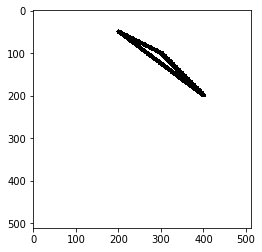

In [3]:
triangle = [[200,50],[400,200],[300,100]]
# Create a polygon
pts = np.array(triangle, np.int32)
pts = pts.reshape((-1,1,2))
polygon = cv2.polylines(img,[pts],True,(0,0,0),thickness=10)
plt.imshow(polygon)
plt.show()

In [4]:
np.random.random_integers(511, size=(3,2))


/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 511 + 1) instead
  """Entry point for launching an IPython kernel.


array([[ 89, 113],
       [ 23, 274],
       [255, 302]])

/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(1, 300 + 1) instead
  del sys.path[0]


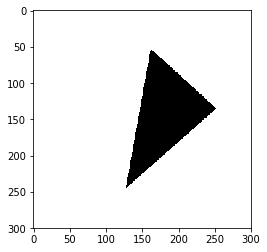

Hu moments of given image are [7.80534801e-04 9.19563381e-08 3.54313000e-14 1.32620093e-13
 8.97149924e-27 4.01824273e-17 1.46864350e-27]


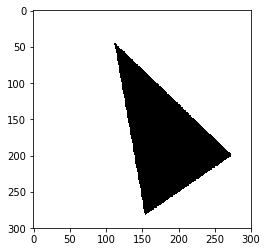

Hu moments of given image are [ 8.19255110e-04  1.03110941e-07  1.92129283e-13  4.92136469e-13
  1.09577271e-25  9.53095754e-17 -1.04372402e-25]


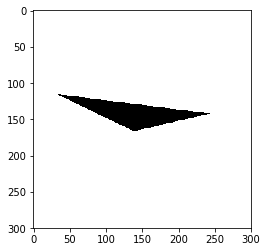

Hu moments of given image are [ 7.41754247e-04  8.25332832e-08  1.47445111e-15  3.52311489e-15
  7.47824394e-30  9.80140016e-19 -2.92468021e-30]


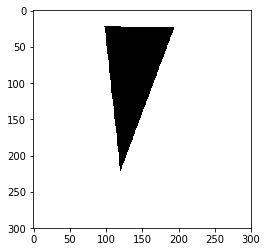

Hu moments of given image are [ 7.75026857e-04  9.40397802e-08  1.07480928e-13  1.23863791e-13
 -1.12339152e-26 -3.27160057e-17 -8.83460814e-27]


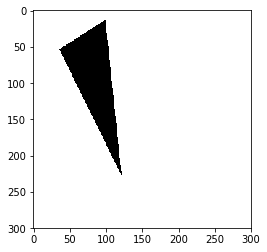

Hu moments of given image are [ 7.59357867e-04  8.82427115e-08  9.95352703e-14  2.27502167e-13
  2.42455760e-26  4.58461751e-17 -2.41695725e-26]


In [7]:
count = 0
triangle_data = []
while count < 5:
    
    # Define size limit
    square_size = 300
    
    # Create white rectangle space
    img = np.zeros((square_size,square_size,3), np.uint8)
    img = util.invert(img)
    
    # Generate polygon coordinate randomly
    triangle = np.random.random_integers(square_size, size=(3,2))
    
    # Generate polygon based on its coordinate
    pts = np.array(triangle, np.int32)
    pts = pts.reshape((-1,1,2))
    polygon = cv2.polylines(img,[pts],True,(0,0,0),thickness=5)

    
    # Extract feature polygon
    labeled_array, num_features = ndimage.label(polygon)
    labeled_array = np.float32(labeled_array)

    
    # Based on the observation, only when num_features=2 polygon are useful
    if num_features == 2:
        
        region = list(np.where(labeled_array == 2))

        arr = np.zeros(img.shape)
        poly1 = zip(region[0], region[1])
        for i in poly1:
            arr[i] = 1
        arr = util.invert(arr)
        plt.imshow(arr, cmap='gray')
        plt.savefig('hi.png')
        plt.show()     
        
        image = cv2.imread('hi.png')
        feature_poly = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hu_moments = cv2.HuMoments(cv2.moments(feature_poly)).flatten()
        triangle_data.append(hu_moments)
        print('Hu moments of given image are {}'.format(hu_moments))
        
        count += 1
    

    
    

In [20]:
print(len(triangle_data))
# np.savetxt("triangle_data_2.csv", triangle_data, delimiter=",")

278


/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 300 + 1) instead
  import sys
/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  
/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 150 + 1) instead
  if __name__ == '__main__':
/anaconda2/envs/py36-test/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(1, 360 + 1) instead
  del sys.path[0]


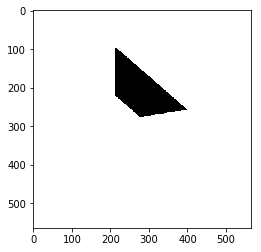

Hu moments of given image are [ 7.44453138e-04  8.37189537e-08  2.70942256e-15  8.60946450e-15
 -3.97775785e-29 -2.33637088e-18 -1.21154748e-29]


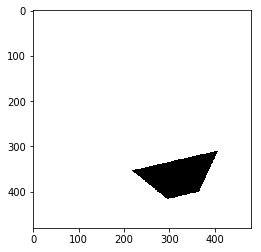

Hu moments of given image are [ 7.39019643e-04  8.29367800e-08  4.63142336e-14  7.19200084e-14
 -2.86548968e-28 -3.34315605e-18 -4.14089754e-27]


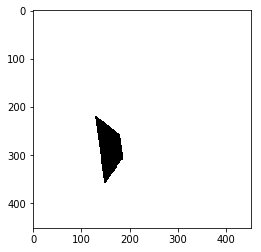

Hu moments of given image are [7.27982416e-04 7.96067998e-08 7.95635399e-15 1.61090266e-14
 1.16965314e-28 1.73010287e-18 1.39925324e-28]


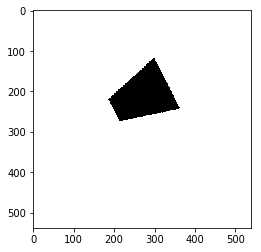

Hu moments of given image are [ 7.45495884e-04  8.38001899e-08  1.44145310e-15  5.75122723e-15
 -1.65520237e-29 -1.65733722e-18  4.89651829e-31]


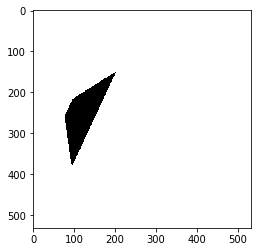

Hu moments of given image are [ 7.36087059e-04  8.10436349e-08  1.72509960e-14  7.01533697e-14
  2.43391563e-27  1.98747487e-17 -1.79233393e-28]


In [10]:
count = 0
trapezoid_data = []
while count < 5:
    square_size = 400
    img = np.zeros((square_size,square_size,3), np.uint8)
    
    h = np.random.random_integers(300)
    w1 = np.random.random_integers(50)
    w2 = np.random.random_integers(150)
    pts = np.array([[200+w1/2,100+h],[100+w2/2,300],[400-w2/2,300],[300-w1/2,100+h]], np.int32)
    pts = pts.reshape((-1,1,2))
    polygon = cv2.polylines(img,[pts],True,(255,255,255),thickness=10)
    r = np.random.random_integers(360)
    polygon = rotate(polygon,r,resize=True)
    polygon = util.invert(polygon)

    
    # Extract feature polygon
    labeled_array, num_features = ndimage.label(polygon)
    labeled_array = np.float32(labeled_array)
    
    if num_features == 2:
        
        region = list(np.where(labeled_array == 2))

        arr = np.zeros(polygon.shape)
        poly1 = zip(region[0], region[1])
        for i in poly1:
            arr[i] = 1
        arr = util.invert(arr)
        plt.imshow(arr, cmap='gray')
        plt.savefig('hi.png')
        plt.show()     
        
        image = cv2.imread('hi.png')
        feature_poly = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hu_moments = cv2.HuMoments(cv2.moments(feature_poly)).flatten()
        trapezoid_data.append(hu_moments)
        print('Hu moments of given image are {}'.format(hu_moments))

        count += 1
        if count % 10 == 0:
            print(count)
    

In [49]:
print(len(trapezoid_data))
np.savetxt("trapezoid_data_0.csv", trapezoid_data, delimiter=",")

100
